# Comparing observed and predicted time series across different time periods

(eg During events, water years, etc)

Demonstrating:
* how to configure the gbr module to find your observed data and your timeclass file
* access observed and predicted time series at sites
* run statistics over full records
* filter by different time periods using .of_timeclass, .of_month, .of_year,
* group by (eg sum) by time periouds using .by_timeclass, .by_month, .by_year, .by_wateryear

In [1]:
# Some steps required until these Python modules are properly installed...
import sys
sys.path.append('../Modules')
sys.path.append('../../../../veneer-py')
# Get the Source scripting components (veneer) and GBR specific stuff
import veneer
import gbr
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
#gbr.init('E:/Beckers/Output/Scenario 1/')
#gbr.init('F:/aa_Source_Temp/RC2015/Model Outputs/Fitzroy RC2015/')
gbr.init('D:/Fitzroy/Results/Fitzroy Rebuild 2014',obs_directory='D:/Fitzroy/Obs/',timeperiods='D:/Fitzroy/Timeseries_class.csv')
gbr.available()

['Baseline_3818_OrigParams',
 'FROM_ROB',
 'FROM_ROB.zip',
 'TEST_REARRANGE_PARALLEL',
 'TEST_REPORTING_SHORT_RUN',
 'TEST_REPORTING_SPEED',
 'TIMING_WITHOUT_PARAC_WITHOUT_PARAN_WITHOUT_PRERUN_WITHOUT_PARAF',
 'TIMING_WITHOUT_PARAC_WITHOUT_PARAN_WITH_PRERUN_WITHOUT_PARAF',
 'TIMING_WITHOUT_PARAC_WITH_PARAN_WITHOUT_PRERUN_WITHOUT_PARAF',
 'TIMING_WITHOUT_PARAC_WITH_PARAN_WITH_PRERUN_WITHOUT_PARAF',
 'TIMING_WITH_PARAC_WITHOUT_PARAN_WITHOUT_PRERUN_WITHOUT_PARAF',
 'TIMING_WITH_PARAC_WITHOUT_PARAN_WITHOUT_PRERUN_WITH_PARAF',
 'TIMING_WITH_PARAC_WITHOUT_PARAN_WITH_PRERUN_WITHOUT_PARAF',
 'TIMING_WITH_PARAC_WITHOUT_PARAN_WITH_PRERUN_WITH_PARAF',
 'TIMING_WITH_PARAC_WITH_PARAN_WITHOUT_PRERUN',
 'TIMING_WITH_PARAC_WITH_PARAN_WITHOUT_PRERUN_WITHOUT_PARAF',
 'TIMING_WITH_PARAC_WITH_PARAN_WITHOUT_PRERUN_WITH_PARAF',
 'TIMING_WITH_PARAC_WITH_PARAN_WITH_PRERUN',
 'TIMING_WITH_PARAC_WITH_PARAN_WITH_PRERUN_WITHOUT_PARAF',
 'TIMING_WITH_PARAC_WITH_PARAN_WITH_PRERUN_WITH_PARAF']

In [3]:
results = gbr.Results('Baseline_3818_OrigParams')

In [4]:
site = 'GS133004A'

In [5]:
# Load the observed data for the site.
# In this case, we're using the obs_directory provided earlier and looking for the first CSV file with the site in the name
obs = results.load_observed_ts(site) # can also specify location here with ,location='D:/Fitzroy/Obs/')
obs[0::200]

,Sediment - Fine,N_DIN,N_Particulate,P_Particulate
Date,,,,
1986-07-01,0.000000,0.000000,0.000000,0.000000
1987-01-17,32047.525305,0.551800,95.241962,55.618475
1987-08-05,12351.770368,0.446077,36.649022,21.403714
1988-02-21,7577.508027,0.136408,25.405205,14.830365
1988-09-08,215.782206,2.751019,0.592720,0.346717
1989-03-27,6861.232070,0.941369,24.636546,13.919076
1989-10-13,33930.299883,1.763803,139.051003,80.460582
1990-05-01,1370.796463,21.960100,1.293301,0.839486


In [6]:
# Load the modelled time series for the same site
# The constituents are all stored in different files, so this loads the constituents that are present in the observed time series
# (ie obs.columns)
pred = results.get_node_ts(site,obs.columns)
pred[0::200]

,Sediment - Fine,N_DIN,N_Particulate,P_Particulate
Date,,,,
1986-07-01,0.000000,0.000000,0.000000,0.000000
1987-01-17,87073.570796,0.456618,363.371149,228.297011
1987-08-05,7629.736392,0.071936,27.548501,16.298770
1988-02-21,123968.767866,0.253576,539.587424,352.568166
1988-09-08,6686.227017,11.727760,33.640093,25.401210
1989-03-27,237081.214630,3.316091,1232.156098,882.820182
1989-10-13,296666.656582,3.587358,1056.402901,595.881215
1990-05-01,12577.430492,114.748207,8.367803,5.344544


## Stats over the whole time period

In [7]:
gbr.stats.nse(obs, pred)

Sediment - Fine   -16.621590
N_DIN             -49.789654
N_Particulate     -31.689644
P_Particulate     -40.473407
dtype: float64

In [8]:
gbr.stats.nse(obs.N_Particulate, pred.N_Particulate)

-31.689644124435006

## Looking at particular time periods / timeclass

In [9]:
# We can load the timeclass file and look at it...
time_periods = results.time_periods()
time_periods[0::1500]

,Water_year,cat
date,,
1900-12-31,1900/1901,NaN
1905-02-08,1904/1905,NaN
1909-03-19,1908/1909,NaN
1913-04-27,1912/1913,NaN
1917-06-05,1916/1917,NaN
1921-07-14,1921/1922,NaN
1925-08-22,1925/1926,NaN
1929-09-30,1929/1930,NaN
1933-11-08,1933/1934,NaN


In [10]:
# !!!! BUT hopedfully you won't need to deal with that directly...
# we now have some helpers, like 'give me all the timesteps for timeclass "b2"'

In [11]:
# Stats in one particular baseflow period
gbr.stats.nse(obs.of_timeclass('b2'),pred.of_timeclass('b2'))


Sediment - Fine   -15.324899
N_DIN              -6.637214
N_Particulate     -37.595497
P_Particulate     -47.830868
dtype: float64

In [12]:
# Matching ALL baseflow periods -- everywhere where timeclass starts with 'b'
def isBaseflow(timeclass):
    return timeclass.startswith('b')

observed_baseflow_days = obs.of_timeclass(isBaseflow)
observed_baseflow_days[::200] # <-- Show me every 200th time step so I know what I'm looking at

,Sediment - Fine,N_DIN,N_Particulate,P_Particulate
Date,,,,
1986-07-01,0.000000,0.000000,0.000000,0.000000
1987-01-17,32047.525305,0.551800,95.241962,55.618475
1987-08-05,12351.770368,0.446077,36.649022,21.403714
1988-02-21,7577.508027,0.136408,25.405205,14.830365
1988-09-19,26.203588,1.336680,0.027557,0.017787
1989-04-27,143786.729652,86.008401,455.431723,262.839900
1989-11-13,20149.025159,0.933700,77.861667,44.391768


In [13]:
predicted_baseflow_days = pred.of_timeclass(isBaseflow)
predicted_baseflow_days[::200]

,Sediment - Fine,N_DIN,N_Particulate,P_Particulate
Date,,,,
1986-07-01,0.000000,0.000000,0.000000,0.000000
1987-01-17,87073.570796,0.456618,363.371149,228.297011
1987-08-05,7629.736392,0.071936,27.548501,16.298770
1988-02-21,123968.767866,0.253576,539.587424,352.568166
1988-09-19,590.299385,7.492880,1.874073,1.442180
1989-04-27,1574610.225258,2871.317029,4333.786920,3058.345970
1989-11-13,195742.732467,3.023593,850.997713,516.160671


In [14]:
gbr.stats.nse(observed_baseflow_days,predicted_baseflow_days)

Sediment - Fine   -14.218309
N_DIN             -62.132665
N_Particulate     -27.684544
P_Particulate     -35.431385
dtype: float64

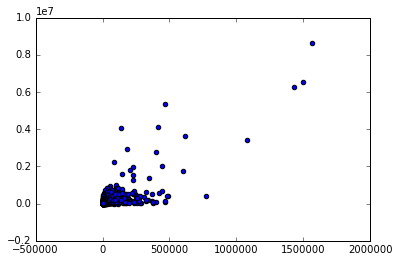

In [15]:
scatter(observed_baseflow_days['Sediment - Fine'],predicted_baseflow_days['Sediment - Fine'])

In [16]:
# Now lets aggregate to each baseflow period and test...
observed_baseflows = observed_baseflow_days.by_timeclass().sum()
predicted_baseflows = predicted_baseflow_days.by_timeclass().sum()
observed_baseflows

,Sediment - Fine,N_DIN,N_Particulate,P_Particulate
cat,,,,
b1,22958346.480942,553.200780,70781.651711,40966.984083
b2,14572680.536808,3104.873395,49668.624500,28693.718928
b3,9516914.130718,1847.328776,33903.329056,19422.249695


In [17]:
gbr.stats.nse(observed_baseflows,predicted_baseflows)

Sediment - Fine    -77.504557
N_DIN             -321.355037
N_Particulate     -240.570174
P_Particulate     -304.807010
dtype: float64

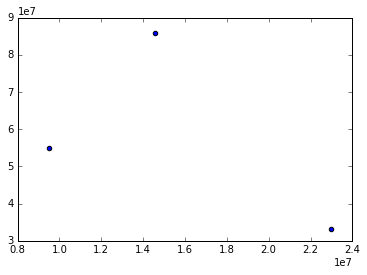

In [18]:
scatter(observed_baseflows['Sediment - Fine'],predicted_baseflows['Sediment - Fine'])

## Exploring timeclass further

Looking at Events this time

In [19]:
observed_event_days = obs.of_timeclass(gbr.timeclass.is_event)
observed_event_days[::20] # <-- show me every 20 time steps of event data

,Sediment - Fine,N_DIN,N_Particulate,P_Particulate
Date,,,,
1988-02-28,2524.371415,0.045442,8.463319,4.940493
1989-04-12,4703.944660,3.329097,15.883190,9.035125
1990-03-31,79198.408613,22.118280,248.559074,141.169466
1990-04-20,75693.854412,103.545053,257.394163,153.079104
1990-05-10,515.550438,12.197736,0.349238,0.244029
1990-05-30,10130.387874,33.020246,27.063912,16.064421
1990-06-19,216.882525,6.664400,0.146221,0.102283


In [20]:
predicted_event_days = pred.of_timeclass(gbr.timeclass.is_event)
predicted_event_days[::20]

,Sediment - Fine,N_DIN,N_Particulate,P_Particulate
Date,,,,
1988-02-28,139578.941129,0.466248,642.888398,433.703899
1989-04-12,21338.791335,125.836047,21.104696,13.206519
1990-03-31,1017828.331594,47.118688,4706.190847,2960.188290
1990-04-20,1016849.601398,1051.345719,4135.531115,2776.746934
1990-05-10,5398.692106,72.311488,2.658643,1.564165
1990-05-30,215715.047616,639.874971,564.974237,394.587704
1990-06-19,5812.289809,68.522710,4.233594,2.766951


In [21]:
observed_event_totals = observed_event_days.by_timeclass().sum()
predicted_event_totals = predicted_event_days.by_timeclass().sum()
observed_event_totals

,Sediment - Fine,N_DIN,N_Particulate,P_Particulate
cat,,,,
87_88_1,345135.107952,10.839712,1754.022329,1052.652815
88_89_1,1206829.267902,189.874441,4149.685353,2358.008523
89_90_1,4757991.964106,3691.661234,14177.211658,8094.372060
89_90_2,1219623.331969,992.737112,3504.059234,1989.330921
89_90_3,9011.912029,216.409099,6.860851,4.677038


In [22]:
gbr.stats.nse(observed_event_totals,predicted_event_totals)

Sediment - Fine    -51.324970
N_DIN              -54.846211
N_Particulate     -104.191481
P_Particulate     -131.495867
dtype: float64

## Water Years


In [23]:
observed_water_year_totals = obs.by_wateryear().sum()
observed_water_year_totals

,Sediment - Fine,N_DIN,N_Particulate,P_Particulate
Water_year,,,,
1986/1987,12005704.068051,395.156900,35647.632550,20818.135596
1987/1988,12879694.418576,229.186880,44339.147435,25609.260239
1988/1989,18293268.486003,4794.889040,60115.683117,34500.789679
1989/1990,11407865.759797,5187.691727,37842.981591,21653.808548


In [24]:
predicted_water_year_totals = pred.by_wateryear().sum()
predicted_water_year_totals

,Sediment - Fine,N_DIN,N_Particulate,P_Particulate
Water_year,,,,
1986/1987,2.253355e+07,268.587647,92004.756624,57632.469046
1987/1988,2.461016e+07,117.887661,129489.045515,81794.781371
1988/1989,1.169111e+08,58019.064434,493041.497927,320586.210736
1989/1990,6.276667e+07,33250.222601,261490.363277,164216.742388


In [25]:
gbr.stats.nse(observed_water_year_totals,predicted_water_year_totals)


Sediment - Fine   -421.017818
N_DIN             -163.672976
N_Particulate     -675.213797
P_Particulate     -905.732436
dtype: float64

## Months

In [26]:
observed_january = obs.of_month(1).by_year().sum()
observed_january

,Sediment - Fine,N_DIN,N_Particulate,P_Particulate
1987,4208502.646686,118.997505,12496.030765,7297.647481
1988,1021060.636625,14.406276,3385.176891,1962.603703
1989,466354.091371,171.808978,1598.409251,934.328721
1990,516191.399143,14.642426,1780.717104,1024.806748


In [27]:
observed_annual = obs.by_year().sum()
observed_annual

,Sediment - Fine,N_DIN,N_Particulate,P_Particulate
1986,6250007.785691,185.108638,18561.869751,10839.942028
1987,14217440.720750,327.621161,43911.790716,25292.751111
1988,14032543.006895,2856.230738,48441.730698,28142.288442
1989,13398150.939799,2302.611593,46851.151140,26774.629273
1990,6688390.279291,4935.352419,20178.902387,11532.383207


In [35]:
# Work for a single constituent, multi sites
def get_observed_multi(results,constituent,sites):
    # Load the constituent of interest for all sites, bundle into a dataframe with each site as a column
    df = pd.DataFrame({s:results.load_observed_ts(s)[constituent] for s in sites})
    
    # Give the dataframe helpful methods related to the timeclass data (eg of_timeclass, by_wateryear, etc)
    results._apply_time_series_helpers(df)
    return df

def get_modelled_multi(results,constituent,sites):
    df = pd.DataFrame({s:results.get_node_ts(s,[constituent])[constituent] for s in sites})
    results._apply_time_series_helpers(df)
    return df

In [36]:
constituent = 'Sediment - Fine'
sites = ['GS133004A']
obs = get_observed_multi(results,constituent,sites)
pred = get_modelled_multi(results,constituent,sites)

gbr.stats.nse(obs,pred)

GS133004A   -16.62159
dtype: float64

In [38]:
obs_baseflow = obs.of_timeclass(gbr.timeclass.is_baseflow).by_timeclass().sum()
pred_baseflow = pred.of_timeclass(gbr.timeclass.is_baseflow).by_timeclass().sum()

gbr.stats.nse(obs_baseflow,pred_baseflow)


GS133004A   -77.504557
dtype: float64